Let’s now talk about the classification problem. This is just like the regression
problem, except that the values $y$ we now want to predict take on only
a small number of discrete values. For now, we will focus on the binary
classification problem in which y can take on only two values, $0$ and $1$.
(Most of what we say here will also generalize to the multiple-class case.)
For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and y may be $1$ if it is a piece
of spam mail, and 0 otherwise. $0$ is also called the negative class, and $1$ the positive class, and they are sometimes also denoted by the symbols “$-$” and “$+$.” Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the label for the training example.


We could approach the classification problem ignoring the fact that $y$ is
discrete-valued, and use our old linear regression algorithm to try to predict
$y$ given $x$. However, it is easy to construct examples where this method
performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take
values larger than $1$ or smaller than $0$ when we know that $y\in{0, 1}$.
To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$. We will choose

$$h_{\theta} = g(\theta^Tx) = \frac{1}{1+\exp{(-\theta^Tx)}}$$

where

$$g(z) = \frac{1}{1+\exp{(-z)}}$$

and $z = \theta^Tx$. $g$ is called the logistic function or the sigmoid function. Here is a plot
showing $g(z)$:


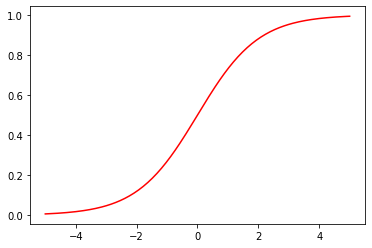

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 200)

sigmoid = nn.Sigmoid()
y_sigmoid = sigmoid(x)

plt.plot(x.numpy(), y_sigmoid.numpy(), c='red', label='sigmoid')
plt.show()

Notice that $g(z)$ tends towards $1$ as $z\rightarrow \infty$, and $g(z)$ tends towards $0$ as
$z\rightarrow -\infty$. Moreover, $g(z)$, and hence also $h(x)$, is always bounded between
$0$ and $1$. As before, we are keeping the convention of letting $x_0 = 1$, so that we can write $\theta_0 + \sum_{i=1}^{m}\theta_ix_i = \theta^Tx$.  Before moving on, here’s a useful property of the derivative of the sigmoid function, which we write as $g'$:

\begin{align*}
g'(z) &= \frac{d}{dz}\frac{1}{1+\exp{(-z)}}\\
&= \frac{1}{(1+\exp{(-z))^2}}\exp(-z)\\
&= \frac{1}{1+\exp(-z)} . \big(1-\frac{1}{1+\exp(-z)}\big)\\
&= g(z).(1-g(z))
\end{align*}

So, given the logistic regression model, how do we fit $\theta$ for it?  Following
how we saw least squares regression could be derived as the maximum likelihood
estimator under a set of assumptions, let’s endow our classification
model with a set of probabilistic assumptions, and then fit the parameters
via maximum likelihood. Let us assume

\begin{align*}
P(y=1|x;\theta) &= h_{\theta}(x)\\
P(y=0|x;\theta) &= 1 - h_{\theta}(x)
\end{align*}

Note that this can be written more compactly as

$$P(y|x;\theta) = (h_{\theta}(x))^y \;(1 - h_{\theta}(x))^{1-y}$$

Assuming that the m training examples were generated independently, we
can then write down the likelihood of the parameters as

\begin{align*}
L(\theta) &= p(\hat{y}|X;\theta)\\
&= \prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)\\
&= \prod_{i=1}^m (h_{\theta}(x^{(i)}))^{y^{(i)}} \;(1 - h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{align*}

As before, it will be easier to maximize the log likelihood:
\begin{align*}
\ell(\theta) &= log\;L(\theta)\\
&= \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))
\end{align*}

How do we maximize the likelihood? Similar to our derivation in the case
of linear regression, we can use gradient ascent. Written in vectorial notation,
our updates will therefore be given by $\theta = \theta + \alpha\nabla_{\theta}\ell(\theta)$. (Note the positive
rather than negative sign in the update formula, since we’re maximizing,
rather than minimizing, a function now.) Let’s start by working with just
one training example $(x, y)$, and take derivatives to derive the stochastic
gradient ascent rule:

\begin{align*}
\frac{\partial}{\partial\theta_j}\ell(\theta) &= \frac{\partial}{\partial\theta} \big[{y}\;log\;(h_{\theta}(x)) + (1-y)\;log\;(1 - h_{\theta}(x))\big]\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\;\frac{\partial}{\partial\theta} g(\theta^Tx)\\
&= \big[ {y}\frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{(1 - g(\theta^Tx))} \big]\; (g(\theta^Tx).(1-g(\theta^Tx)))\frac{\partial}{\partial\theta}\theta^T x \\
&= \big[ {y}(1 - g(\theta^Tx)) - (1-y)g(\theta^Tx) \big]\;x_j\\
&= \big[y - yg(\theta^Tx) - g(\theta^Tx) + yg(\theta^Tx) \big]\;x_j\\
&= \big[y - h_{\theta}(x)\big]\;x_j
\end{align*}

Using the above equation, we derive the gradient descent algorithm for logistic regression:

\begin{align}
repeat \{\\
&\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j\\
\}
\end{align}

#### Regularized logistic regression

\begin{align*}
min_{\theta}\;J(\theta)= \big[-\frac{1}{m} \sum_{i=1}^m {y^{(i)}}log\;(h_{\theta}(x^{(i)})) + (1-y^{(i)})\;log\;(1 - h_{\theta}(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^m \theta_j^2
\end{align*}

\begin{align}
repeat \{\\
&\theta_0 = \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_0\\
&\theta_j = \theta_j - \alpha\big[\frac{1}{m}\sum_{i=1}^m(y^{(i)} - h_{\theta}(x^{(i)})).x^{(i)}_j-\frac{\lambda}{m}\theta_j\big]\\
\}
\end{align}

### Maximum a posteriori (MAP)

We use Maximum likelihood estimation as our cost function to find the optimized $w*$.

$$
\begin{split}
w^* = \arg\max_w (P(Y \vert X, w)) & = \arg\max_w \prod^n_{i=1} P( y_i \vert x_i, w)
\end{split}
$$

Alternatively, we can use Maximum a posteriori (MAP) to find the optimized $w*$. 

$$
P(w \vert x, y)
$$

In this section, we go through the process of how some cost functions are defined using MAP.

Using Baye's theorem:

$$
\begin{split}
p(w \vert x, y) & = \frac{p(y \vert x, w) p(w \vert x)}{p(y \vert x)} \\
& = \frac{p(y \vert x, w) p(w)}{p(y \vert x)} \quad & \text{ w is not depend on x}\\
\end{split}
$$

Take the negative log

$$
\begin{split}
-\log p(w \vert x, y) & = - \log p(y \vert x, w) - \log p(w \vert x) - \log p(y \vert x) \\
& = -\log p(y \vert x, w) - \log p(w \vert x) - C^{'} \\
\end{split}
$$

The total cost for all training data is

$$
\begin{split}
J(w) & = - \sum^N_{i=1} \log p(y_i \vert x_i, w) - \sum^d_{j=1} \log p(w_j) - C \\
\end{split}
$$

Compute the prior with the assumption that it has a Gaussian distribution of $ \mu=0, \sigma^2 = \frac{1}{\lambda}$:

$$
\begin{split}
p(w_j) & =  \frac{1}{\sqrt{2 \pi \frac{1}{\lambda}}} e^{-\frac{(w_j - 0)^{2}}{2\frac{1}{\lambda}} } \\
\log p(w_j) & = - \log {\sqrt{2 \pi \frac{1}{\lambda}}} + \log e^{- \frac{\lambda}{2}w_j^2}  \\
& = C^{'} - \frac{\lambda}{2}w_j^2 \\
- \sum^d_{j=1} \log p(w_j) &= C + \frac{\lambda}{2} \| w \|^2 \quad \text{ L-2 regularization}
\end{split}
$$

If the likelihood is also gaussian distributed:

$$
\begin{split}
p(y_i \vert x_i, w) & \propto e^{ - \frac{(w^T x_i - y_i)^2}{2 \sigma^2} } \\
- \sum^N_{i=1} \log p(y_i \vert x_i, w) & = \frac{1}{2 \sigma^2} \| w^T x_i - y_i \|^2 \\
\end{split}
$$

So for a Gaussian distribution prior and likelihood, the cost function is

$$
\begin{split}
J(w) & = - \sum^N_{i=1} \log p(y_i \vert x_i, w) - \sum^d_{j=1} \log p(w_j) - C \\
&=  \frac{1}{2 \sigma^2} \| w^T x_i - y_i \|^2 + \frac{\lambda}{2} \| w \|^2 + constant
\end{split}
$$

which is the same as the MSE with L2-regularization.

If the likeliness is computed from a logistic function, the corresponding cost function is:

$$
\begin{split}
p(y_i \vert x_i, w) & = \frac{1}{ 1 + e^{- y_i w^T x_i} } \\
J(w) & = - \sum^N_{i=1} \log p(y_i \vert x_i, w) - \sum^d_{j=1} \log p(w_j) - C \\
&= \sum^N_{i=1} \log(1 + e^{- y_i w^T x_i})  + \frac{\lambda}{2} \| w \|^2 + constant
\end{split}
$$


### Implementation

In [2]:
# Load data
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = torch.from_numpy(data[:, :2]).float()
y = torch.from_numpy(data[:, 2]).float()

OSError: data/ex2data1.txt not found.

In [ ]:
class LogisticReg(nn.Module):
    def __init__(self):
        super(LogisticReg, self).__init__()
        
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    

# Model
model = LogisticReg()

criterion = nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred[:,0], y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))
print ('Final Weights: {}'.format(model.linear.weight.data))
print ('Final Bias: {}'.format(model.linear.bias.data))


out = model(X)

print((out[:,0] == y).sum())

Epoch [100/1000], Loss: 1105.2411
Epoch [200/1000], Loss: 1105.2411
Epoch [300/1000], Loss: 1105.2411
Epoch [400/1000], Loss: 1105.2411
Epoch [500/1000], Loss: 1105.2411
Epoch [600/1000], Loss: 1105.2411
Epoch [700/1000], Loss: 1105.2411
Epoch [800/1000], Loss: 1105.2411
Epoch [900/1000], Loss: 1105.2411
Epoch [1000/1000], Loss: 1105.2411
Final Weights: tensor([[0.2199, 0.2499]])
Final Bias: tensor([-0.2935])
tensor(60)


### Softmax classifier

For many classification problems, we categorize an input to one of the many classes. For example, we can classify an image to one of the 100 possible object classes. We use a softmax classifier to compute K probabilities, one per class for an input image and the combined probabilities remains 1.

<div class="imgcap">
<img src="images/deep_learner2.jpg" style="border:none;width:70%;">
</div>

The network computes K scores per image. The probability that an image belongs to the class $$ i $$ will be.
$$
p_i =  \frac{e^{score_i}}{\sum_{c \in y} e^{score_c}} 
$$
For example, the school bus above may have a score of (3.2, 0.8, 0) for the class school bus, truck and airplane respectively. The probability for the corresponding class is
$$
p_{\text{bus}} =  \frac{e^{3.2}}{ e^{3.2} + e^{0.8} + e^0} = 0.88
$$

$$
p_{\text{truck}} =  \frac{e^{0.2}}{ e^{3.2} + e^{0.8} + e^0} = 0.08
$$

$$
p_{\text{airplane}} =  \frac{e^0}{ e^{3.2} + e^{0.8} + e^0} = 0.04
$$

In [ ]:
def softmax(z):
    z -= np.max(z)
    return np.exp(z) / np.sum(np.exp(z))

a = np.array([3.2, 0.8, 0])
print(softmax(a))

[0.88379809 0.08017635 0.03602556]


In [ ]:
smax = nn.Softmax(dim=0)
x = torch.from_numpy(a)
z = smax(x)
print(z.numpy())

[0.88379809 0.08017635 0.03602556]


To avoid the numerical stability problem caused by adding large exponential values, we subtract the inputs by its maximum. Adding or subtract a number from the input does not change the probability value in softmax.
$$
softmax(z) = \frac{e^{z_i -max}}{\sum e^{z_c  - max}} =  \frac{e^{-max} e^{z_i}}{e^{-max} \sum e^{z_c}} = \frac{e^{z_i}}{\sum e^{z_c}}
$$
```python
z -= np.max(z)
```

**logits** is defined as a mean to measure odd.
$$
logits = \log(\frac{p}{1-p})
$$
If we combine the softmax equation with the logits equation, it is easy to see that the score is the logit. 
$$
p = softmax(score) = softmax(z_i) = \frac{e^{z_i}}{\sum e^{z_c}} \\
logits = z_i = score
$$
That is why in many literatures and APIs, logit and score are interchangeable when a softmax classifier is used. However, other function's output can be a logit. Sigmoid function output is also a logit.

> Softmax is the most common classifier among others.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as data
import matplotlib.pyplot as plt
import numpy as np

train_dataset = data.MNIST(root='./data', train=True,
                           transform=transforms.ToTensor(), download=True)

test_dataset = data.MNIST(root='./data', train=False,
                          transform=transforms.ToTensor())

batch_size = 100
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)

tensor(5)


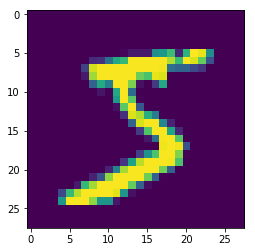

In [ ]:
img = train_dataset[0][0].numpy().reshape(28, 28)
print(train_dataset[0][1])
plt.imshow(img)
plt.show()

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out 

In [ ]:
epochs = int(3000 / (len(train_dataset) / batch_size))
input_dim = 28 * 28
output_dim = 10
learning_rate = 0.001

model = LogisticRegressionModel(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).requires_grad_()
        labels = labels

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28 * 28).requires_grad_()

                outputs = model(images)

                _, predict = torch.max(outputs.data, 1)

                total += labels.size(0)

                correct += (predict == labels).sum()

            accuracy = 100 * (correct.item() / total)

            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(
                iter, loss.item(), accuracy))

Iteration: 500, Loss: 1.8531372547149658, Accuracy: 68.05
Iteration: 1000, Loss: 1.550645351409912, Accuracy: 76.14999999999999
Iteration: 1500, Loss: 1.3934663534164429, Accuracy: 79.45
Iteration: 2000, Loss: 1.1908916234970093, Accuracy: 81.3
Iteration: 2500, Loss: 1.0140771865844727, Accuracy: 82.52000000000001
Iteration: 3000, Loss: 0.9862807989120483, Accuracy: 83.04


In [ ]:
save_model = False
if save_model:
    torch.save(model, 'logistic_model.pth')